#  Calculative Foundation

## IMPORT LIBRARIES

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm, eig, inv, det, svd
from scipy.linalg import lu
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## LOAD DATASET

In [37]:
# Load dataset
df = pd.read_csv("student_performance.csv")

# Select only subject columns
subjects = ["Math", "Physics", "Chemistry", "English", "Computer", "Statistics"]
X = df[subjects].values

df.head(1)

,Student_ID,Math,Physics,Chemistry,English,Computer,Statistics,Average,Category
0,S1,78,86,65,91,79,83,80.333333,Above Average


## PART A: Vector & Matrix Fundamentals

### 1. Represent Each Student as Vector

In [5]:
student1 = X[0]
student2 = X[1]

print("Student 1 Vector:", student1)
print("Student 2 Vector:", student2)

Student 1 Vector: [78 86 65 91 79 83]
Student 2 Vector: [91 96 50 66 88 63]


#### Interpretation:
- Each student is represented as a 6-dimensional vector where each component corresponds to marks in a subject. This allows us to apply linear algebra operations on student performance data.

### 2. Norm-1 and Norm-2

In [7]:
norm1 = norm(student1, 1)
norm2 = norm(student1, 2)

print("L1 Norm:", norm1)
print("L2 Norm:", norm2)

L1 Norm: 482.0
L2 Norm: 197.77765293379332


#### Interpretation:
- The L1 norm represents the total absolute performance across subjects.
- The L2 norm represents the overall magnitude (strength) of the student’s performance vector in multidimensional space.

### 3. Dot Product & Angle

In [9]:
dot_product = np.dot(student1, student2)

angle = np.arccos(dot_product / (norm(student1)*norm(student2)))
angle_degree = np.degrees(angle)

print("Dot Product:", dot_product)
print("Angle (degrees):", angle_degree)

Dot Product: 36791
Angle (degrees): 11.614399651798749


#### Interpretation:
- The dot product measures similarity between two students' performance.
- The small angle (~11°) indicates that both students have very similar performance patterns across subjects.

### 4. Cross Product (Select 3 Subjects)

In [11]:
v1 = student1[:3]
v2 = student2[:3]

cross_product = np.cross(v1, v2)
print("Cross Product:", cross_product)

Cross Product: [-1940  2015  -338]


#### Interpretation:
- The cross product gives a vector perpendicular to the two selected subject vectors (3D case).
- It shows the directional difference between the two students in 3 subjects.

### 5. Projection of One Vector onto Another

In [13]:
projection = (np.dot(student1, student2) / np.dot(student2, student2)) * student2
print("Projection of Student1 onto Student2:", projection)

Projection of Student1 onto Student2: [92.8292852  97.92979538 51.00510176 67.32673432 89.76897909 64.26642821]


#### Interpretation:
- Projection shows how much one student’s performance aligns with another student’s performance direction.
- It measures the component of one vector along another.

## PART B: Matrix Operations

### 6. Create Matrix

In [15]:
matrix = X
print("Matrix Shape:", matrix.shape)

Matrix Shape: (250, 6)


#### Interpretation:
- The dataset forms a 250×6 matrix, where rows represent students and columns represent subjects.

### 7. Matrix Addition & Multiplication

In [17]:
A = matrix[:6, :6]
B = matrix[6:12, :6]

addition = A + B
multiplication = np.dot(A, B.T)

print("Matrix Addition:\n", addition)
print("Matrix Multiplication:\n", multiplication)

Matrix Addition:
 [[138 122 143 152 161 181]
 [169 133 115 136 174 148]
 [165 182 118 171 152 118]
 [112 179  91 119 167 120]
 [144  82 144 139 131 125]
 [ 97 109 159 185 158 184]]
Matrix Multiplication:
 [[33009 33710 37181 32368 27414 32745]
 [30232 31443 35991 31465 25272 29299]
 [29733 30599 34849 30183 25339 29845]
 [25664 26584 30463 26937 21090 25648]
 [29175 30206 32069 27000 24085 29024]
 [34758 34409 35920 32370 28720 34304]]


#### Interpretation:
- Matrix addition combines corresponding student scores.
- Matrix multiplication represents interaction between different groups of students and their subject performance.

### 8. Transpose, Inverse (if possible), Determinant

In [19]:
square_matrix = matrix[:6, :6]

transpose = square_matrix.T
determinant = det(square_matrix)

print("Determinant:", determinant)

if determinant != 0:
    inverse = inv(square_matrix)
    print("Inverse:\n", inverse)

Determinant: 4810654775.000003
Inverse:
 [[-0.00410223  0.0157166   0.00813924 -0.02034594  0.0102095  -0.00855749]
 [ 0.01943508  0.00134302  0.00395495  0.00322659 -0.02201288 -0.00587804]
 [-0.0404952   0.01860479  0.03021557 -0.03011861  0.00128176  0.01983472]
 [ 0.01729318 -0.03248065  0.01326624  0.0118529   0.00871936 -0.01383569]
 [-0.04086663  0.0123736  -0.01282489  0.02154884  0.01346924  0.01416124]
 [ 0.04741602 -0.00689736 -0.0377477   0.00585824 -0.01016963  0.00028974]]


#### Determinant
#### Interpretation:
- Since determinant ≠ 0, the matrix is invertible.
- This means subject data is linearly independent and contains full rank information.
#### Inverse Matrix
#### Interpretation:
- The inverse matrix represents a reverse linear transformation of the original data matrix.

## PART C: Linear Transformations & Geometry

### 9. Covariance Matrix

In [21]:
cov_matrix = np.cov(X.T)
print("Covariance Matrix:\n", cov_matrix)

Covariance Matrix:
 [[303.1684498   15.02541365   1.9431004   -4.78705221  -2.60896386
    7.66856225]
 [ 15.02541365 363.51781526  27.09632129   7.61561446   9.21853815
  -45.22223293]
 [  1.9431004   27.09632129 404.84536546  13.58261847   4.77551807
   41.47958233]
 [ -4.78705221   7.61561446  13.58261847 260.80001606 -22.50350201
   22.64261847]
 [ -2.60896386   9.21853815   4.77551807 -22.50350201 207.87066667
   17.15535743]
 [  7.66856225 -45.22223293  41.47958233  22.64261847  17.15535743
  268.72785542]]


#### Interpretation:
- The covariance matrix shows how subjects vary together.
- Positive values indicate subjects increase together, while negative values indicate inverse relationship.

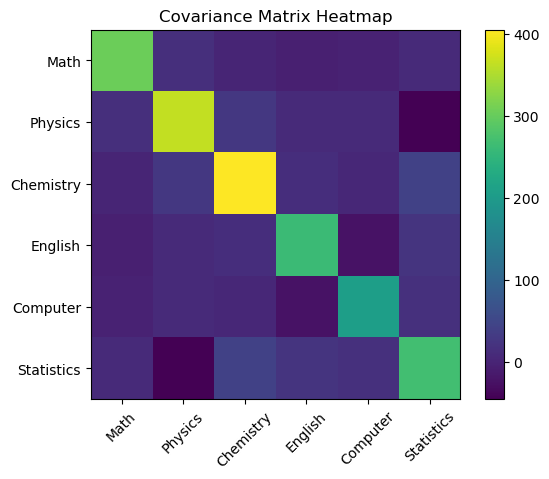

In [77]:
# Plot Heatmap
plt.figure()
plt.imshow(cov_matrix)
plt.title("Covariance Matrix Heatmap")
plt.xticks(range(len(subjects)), subjects, rotation=45)
plt.yticks(range(len(subjects)), subjects)
plt.colorbar()
plt.show()

#### Interpretation
- The diagonal values are highest because they represent variance of each subject. Off-diagonal values show how subjects vary together.
- Positive values indicate subjects increase together, while negative values indicate inverse relationships between subjects.

### Line

Line Equation:
Physics = 0.05 * Math + 63.523


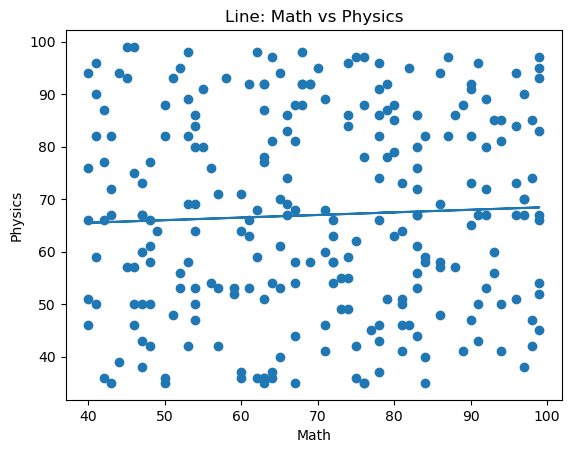

In [96]:
# Select variables
x = df["Math"].values
y = df["Physics"].values

# Calculate slope (m) and intercept (c)
m, c = np.polyfit(x, y, 1)

print("Line Equation:")
print("Physics =", round(m,3), "* Math +", round(c,3))

# Plot
plt.figure()
plt.scatter(x, y)
plt.plot(x, m*x + c)
plt.title("Line: Math vs Physics")
plt.xlabel("Math")
plt.ylabel("Physics")
plt.show()

### Plane

Plane Equation:
Chemistry = 0.003 * Math + 0.074 * Physics + 58.321


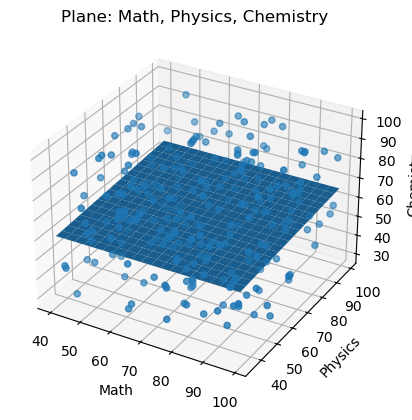

In [100]:
from mpl_toolkits.mplot3d import Axes3D

# Select variables
X = df[["Math", "Physics"]].values
Z = df["Chemistry"].values

# Add column of ones for intercept
X_design = np.c_[X, np.ones(X.shape[0])]

# Solve coefficients
coeff, _, _, _ = np.linalg.lstsq(X_design, Z, rcond=None)
a, b, d = coeff

print("Plane Equation:")
print("Chemistry =", round(a,3), "* Math +", round(b,3), "* Physics +", round(d,3))

# Create surface
x_surf = np.linspace(X[:,0].min(), X[:,0].max(), 20)
y_surf = np.linspace(X[:,1].min(), X[:,1].max(), 20)
X_surf, Y_surf = np.meshgrid(x_surf, y_surf)
Z_surf = a*X_surf + b*Y_surf + d

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Math"], df["Physics"], df["Chemistry"])
ax.plot_surface(X_surf, Y_surf, Z_surf)
ax.set_title("Plane: Math, Physics, Chemistry")
ax.set_xlabel("Math")
ax.set_ylabel("Physics")
ax.set_zlabel("Chemistry")
plt.show()

### Hyperplane

Hyperplane Equation:
w1*Math + w2*Physics + w3*Chemistry + w4*English + w5*Computer + w6*Statistics + b = 0
Weights: [ 0.005  0.009 -0.162]


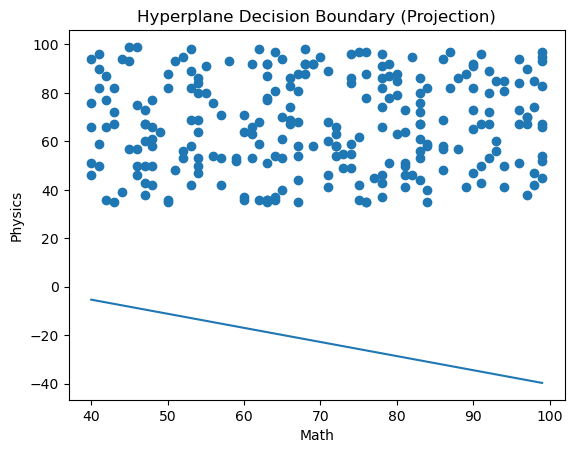

In [106]:
# Create binary target (Above / Below Average)
y = np.where(df["Average"] >= 60, 1, -1)

# Add bias column (for intercept)
X_design = np.c_[X, np.ones(X.shape[0])]

# Solve weights using Least Squares
weights, _, _, _ = np.linalg.lstsq(X_design, y, rcond=None)

print("Hyperplane Equation:")
print("w1*Math + w2*Physics + w3*Chemistry + w4*English + w5*Computer + w6*Statistics + b = 0")
print("Weights:", np.round(weights,3))

# -------- Visualization (2D projection using Math & Physics) --------
w1 = weights[0]
w2 = weights[1]
b = weights[-1]

x_vals = np.linspace(df["Math"].min(), df["Math"].max(), 100)
y_vals = -(w1*x_vals + b) / w2

plt.figure()
plt.scatter(df["Math"], df["Physics"])
plt.plot(x_vals, y_vals)
plt.title("Hyperplane Decision Boundary (Projection)")
plt.xlabel("Math")
plt.ylabel("Physics")
plt.show()

### 10. Eigenvalues & Eigenvectors

In [23]:
eigenvalues, eigenvectors = eig(cov_matrix)

print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues:
 [423.99871169 380.97035649 186.54080391 303.69468404 241.65645079
 272.06916175]
Eigenvectors:
 [[ 0.0601733   0.12286888 -0.08244444  0.97618593  0.14627557 -0.01223998]
 [ 0.3148487   0.86636182  0.1782697  -0.06625739 -0.30191394  0.15154319]
 [ 0.92322911 -0.21401713 -0.05755332 -0.07161905  0.22852058 -0.20293188]
 [ 0.10949952 -0.05586459 -0.38107235 -0.0489984   0.18901088  0.89529152]
 [ 0.0358168   0.00297294 -0.80417358  0.0085114  -0.54658268 -0.23062548]
 [ 0.17783276 -0.43056639  0.40767532  0.18726563 -0.70763835  0.28454959]]


#### Interpretation:
- Eigenvalues represent the amount of variance captured in each principal direction.
- Eigenvectors represent the direction of maximum variance in the dataset.

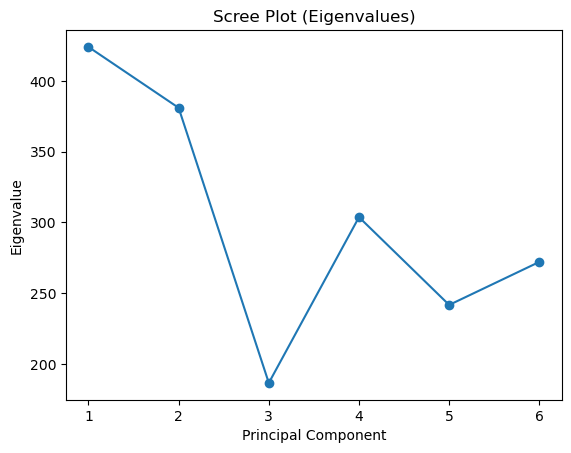

In [80]:
# Scree Plot
plt.figure()
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, marker='o')
plt.title("Scree Plot (Eigenvalues)")
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.show()

#### Interpretation
- The scree plot shows that the first few eigenvalues are larger, meaning they capture more variance in the dataset.
- After the first few components, the eigenvalues decrease, indicating lower contribution to total variance.
- This helps determine how many principal components should be selected for dimensionality reduction.

### 11. LU Decomposition

In [25]:
P, L, U = lu(square_matrix)

print("L Matrix:\n", L)
print("U Matrix:\n", U)

L Matrix:
 [[ 1.          0.          0.          0.          0.          0.        ]
 [ 0.9010989   1.          0.          0.          0.          0.        ]
 [ 0.51648352 -0.57813348  1.          0.          0.          0.        ]
 [ 0.59340659 -0.71676614  0.20934373  1.          0.          0.        ]
 [ 0.74725275 -0.5002713   0.44046859  0.58639093  1.          0.        ]
 [ 0.85714286 -0.09169832  0.31868028  0.34327363  0.79609592  1.        ]]
U Matrix:
 [[ 91.          96.          50.          66.          88.
   63.        ]
 [  0.         -40.50549451   7.94505495  27.52747253  -1.2967033
   12.23076923]
 [  0.           0.          71.76912642  73.82664135  40.79978296
   69.53255562]
 [  0.           0.           0.          39.11078056  23.30960796
    5.82578126]
 [  0.           0.           0.           0.         -22.04651045
  -19.00131195]
 [  0.           0.           0.           0.           0.
   21.08991643]]


#### Interpretation:
- LU decomposition factorizes the matrix into lower and upper triangular matrices, making matrix computations easier and more efficient.

### 12. Singular Value Decomposition (SVD)

In [27]:
U_svd, S_svd, Vt_svd = svd(matrix)

print("Singular Values:\n", S_svd)

Singular Values:
 [2712.70960598  309.04777276  299.26516706  267.79961384  252.38252295
  221.968143  ]


#### Interpretation:
- SVD decomposes the dataset into three matrices representing rotation and scaling.
- Larger singular values indicate more important underlying patterns in student performance.

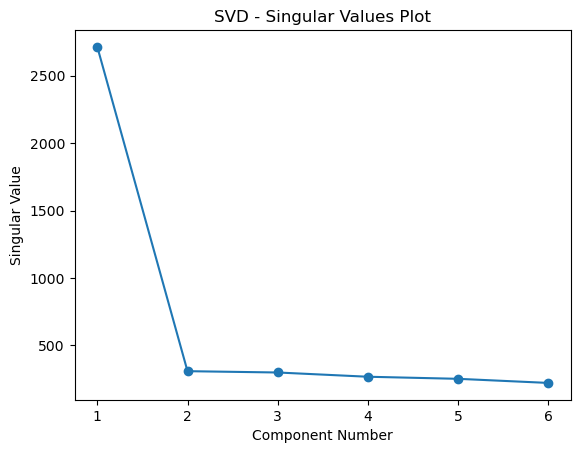

In [87]:
# Plot Singular Values
plt.figure()
plt.plot(range(1, len(S_svd)+1), S_svd, marker='o')
plt.title("SVD - Singular Values Plot")
plt.xlabel("Component Number")
plt.ylabel("Singular Value")
plt.show()

#### Interpretation 
- The first singular value is significantly larger than the others, indicating that most of the data variance is captured in the first principal direction.
- The remaining singular values gradually decrease, showing diminishing importance of higher components.
- This confirms that dimensionality reduction can be effectively applied to this dataset.

## PART E: Dimensionality Reduction

### 13. PCA (Reduce to 2D)

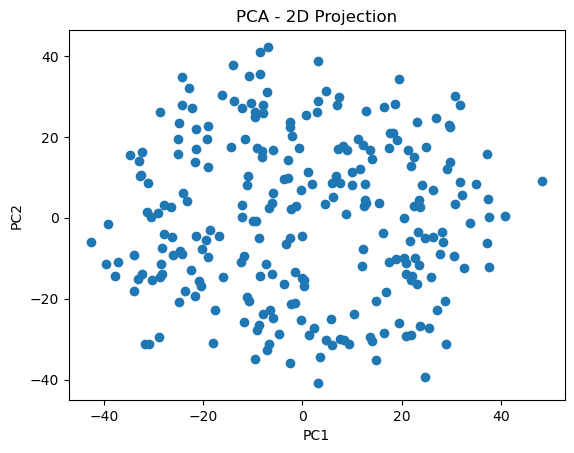

In [29]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1])
plt.title("PCA - 2D Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

#### Interpretation:
- PCA reduces 6-dimensional data into 2 principal components while preserving maximum variance.
- The explained variance ratio shows how much information is retained.

### 14. LDA (Above vs Below Average)

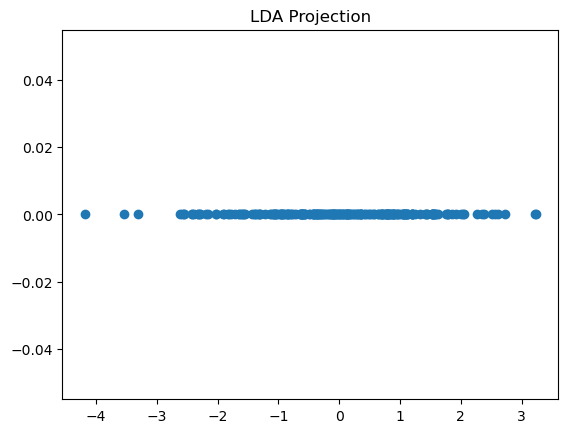

In [31]:
y = df["Category"]

lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y)

plt.scatter(X_lda, np.zeros_like(X_lda))
plt.title("LDA Projection")
plt.show()

#### Interpretation:
- LDA projects the data onto a new axis that maximizes separation between "Above Average" and "Below Average" students.
- It is mainly used for classification purposes.